<a href="https://colab.research.google.com/github/Jerrylu99/lab3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [ ]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()
print(df.shape)
df.head()


Fetching data...
(25, 36)


economy           CHN                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
2000         0.347811         NaN   16.983455   20.681599           33.632683   
2001         0.719126         NaN   16.565574   20.077687           35.523858   
2002        -0.731971         NaN   16.223333   22.351823           36.068782   
2003         1.127603         NaN   15.463135   26.602374           39.428013   
2004         3.824637         NaN   14.776896   30.609716           41.634374   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      18.329343  2.825096e+12          2237.442985         36.265233   
2001      18.004960  3.059936e+12          2405.893967         37.865837   
2002      19.842619  3.342778e+12          2610.729603         38.792525   
2003      24.475106  3.681007e+12          2857.037354         41.731545   
2004      28.030618  4.053945e+12          3127.862765         44.476216   

economy                  ...         WLD                                  \
series  Labor_Part_Rate  ... Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                     ...                                               
2000             74.190  ...   15.999621   23.465314           24.462487   
2001             73.878  ...   16.382130   22.870610           23.695335   
2002             73.563  ...   16.782459   23.116728           23.026378   
2003             73.246  ...   17.036216   23.862095           23.203246   
2004             72.927  ...   16.884092   25.722670           23.912776   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      23.412644  4.842569e+13          7858.907966         23.953361   
2001      22.913313  4.941287e+13          7912.245893         23.070254   
2002      22.930455  5.055484e+13          7989.628892         22.700953   
2003      23.686598  5.211892e+13          8131.193084         22.795603   
2004      25.471904  5.446523e+13          8388.597338         23.698974   

economy                                                      
series  Labor_Part_Rate Labor_Force_Total Unemployment_Rate  
Year                                                         
2000          64.511769      2.765727e+09          6.123041  
2001          64.304147      2.809257e+09          6.202248  
2002          64.114659      2.853895e+09          6.428257  
2003          63.977476      2.900596e+09          6.495525  
2004          63.895015      2.950148e+09          6.337627  

[5 rows x 36 columns]

In [ ]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

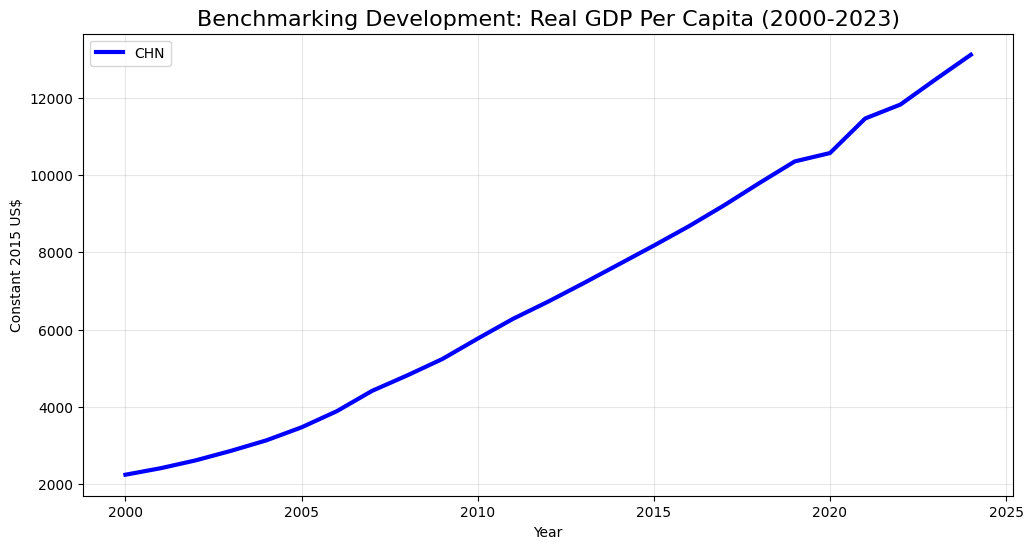

In [ ]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='CHN', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

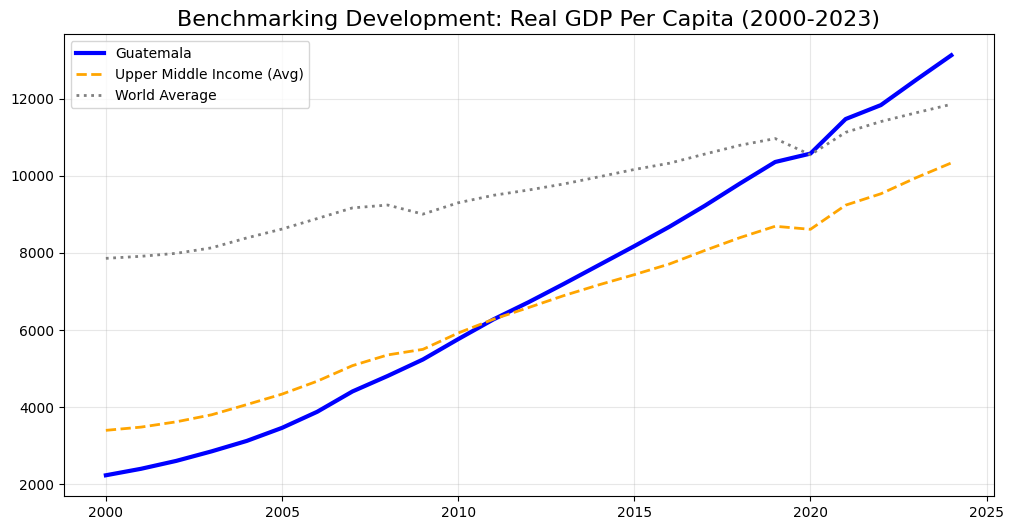

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

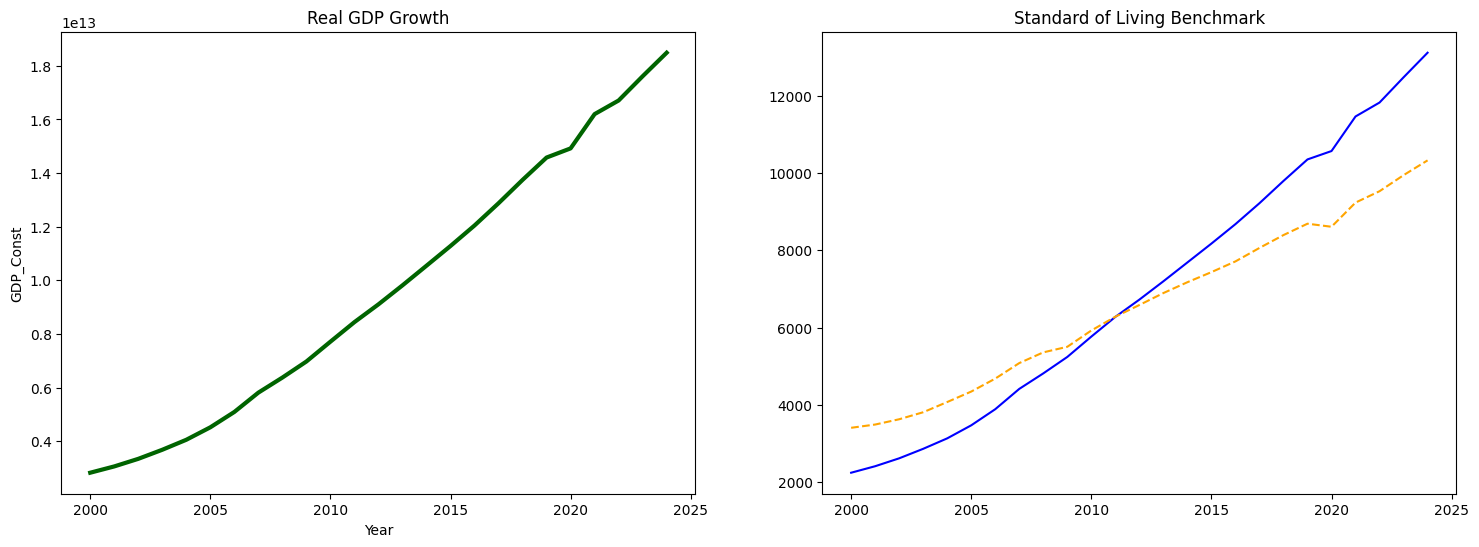

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

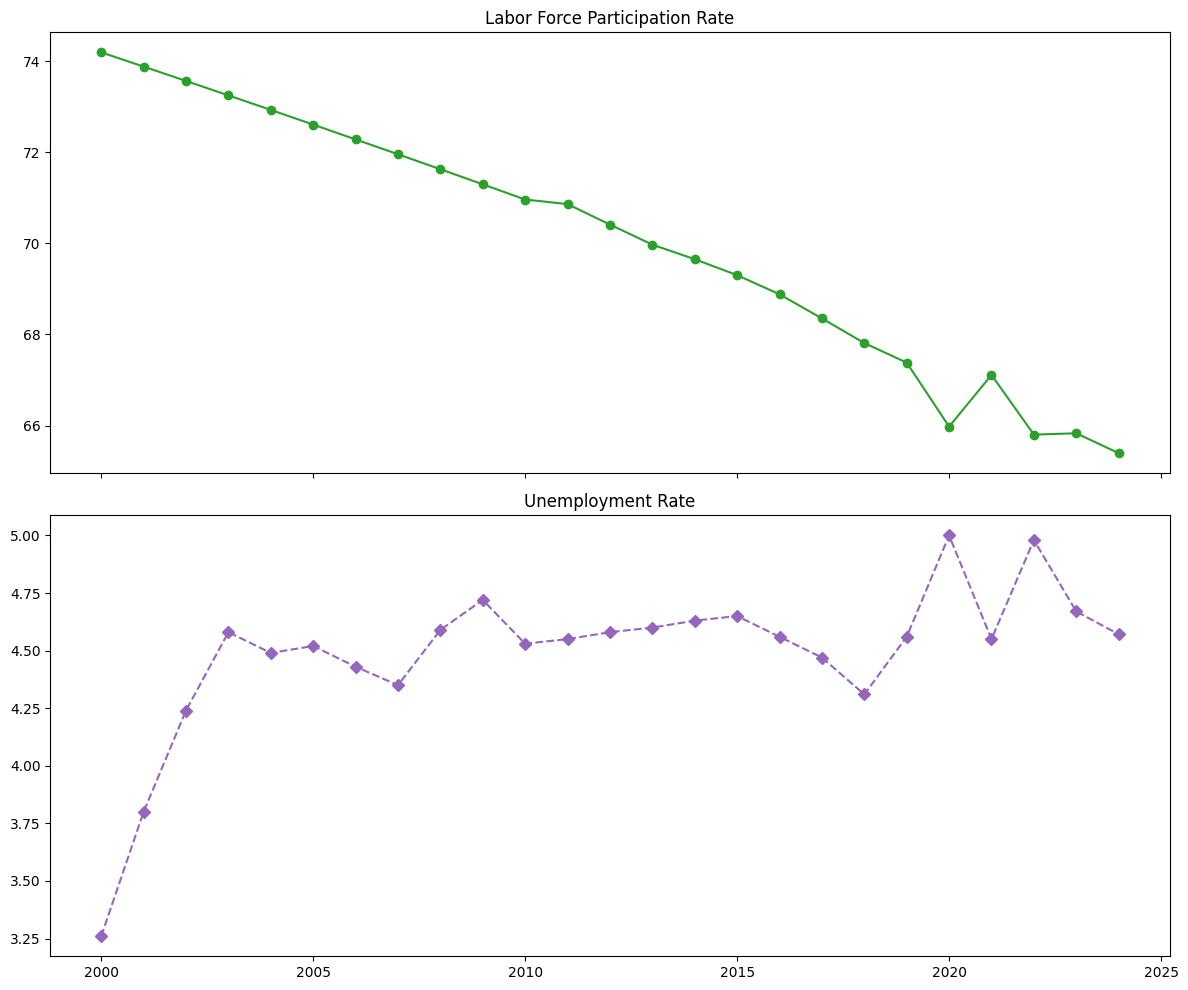

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

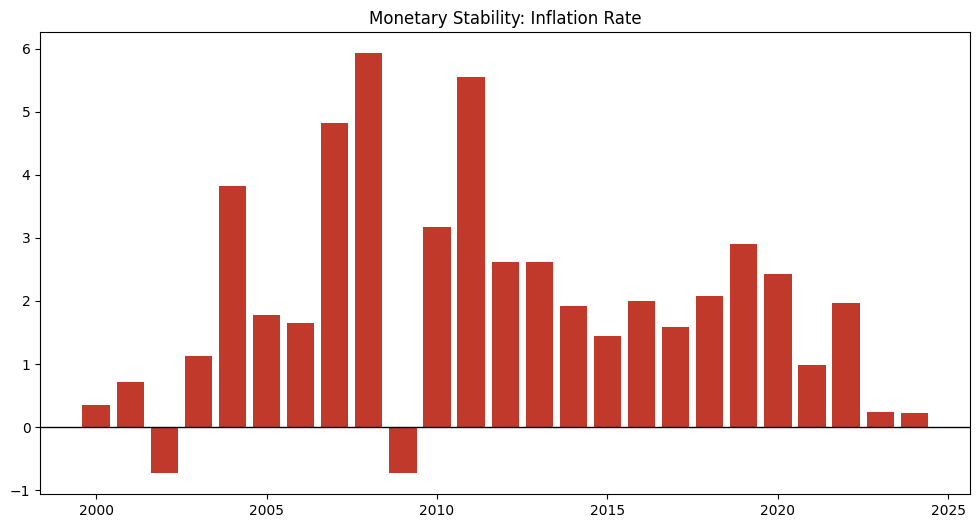

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

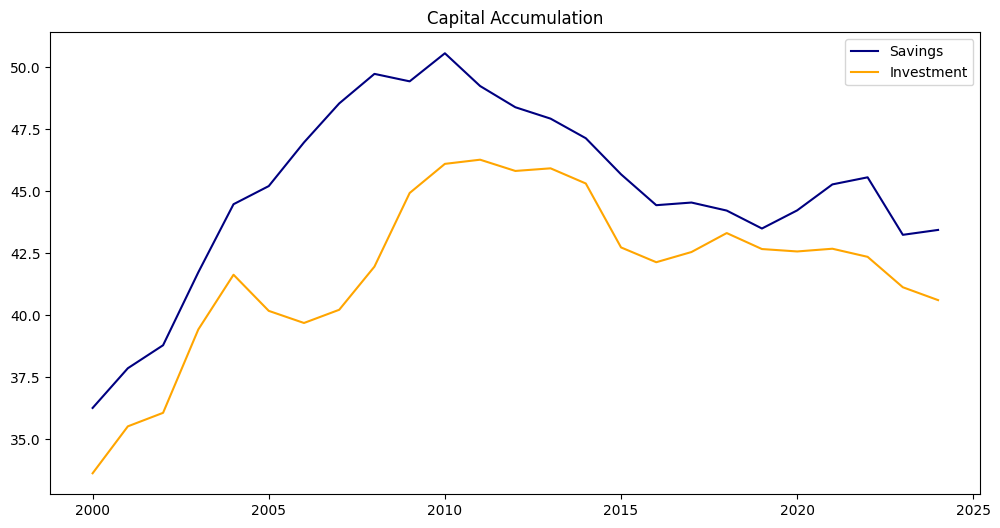

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

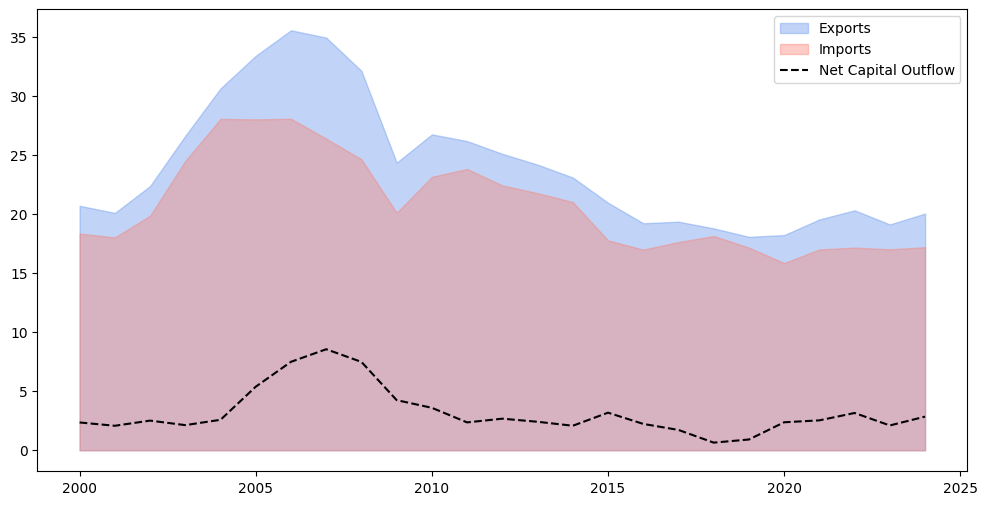

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

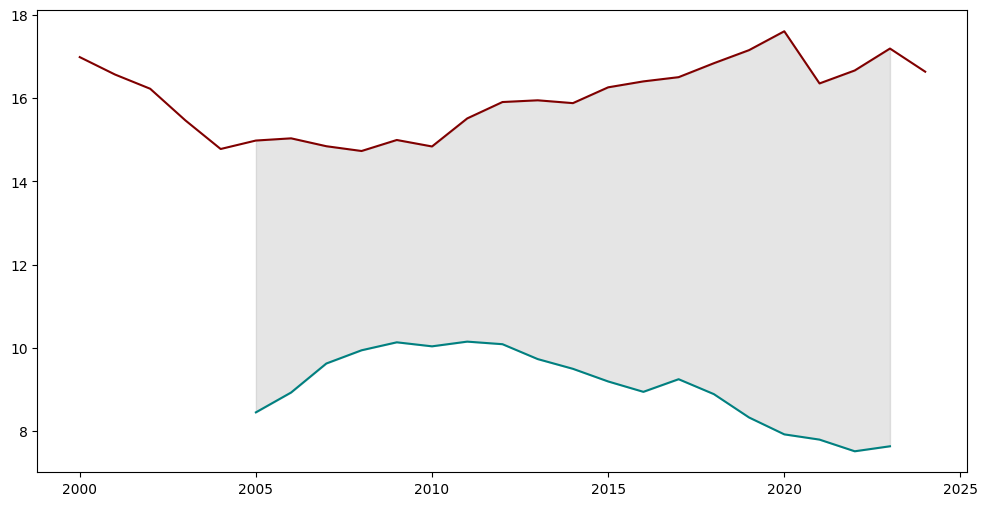

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

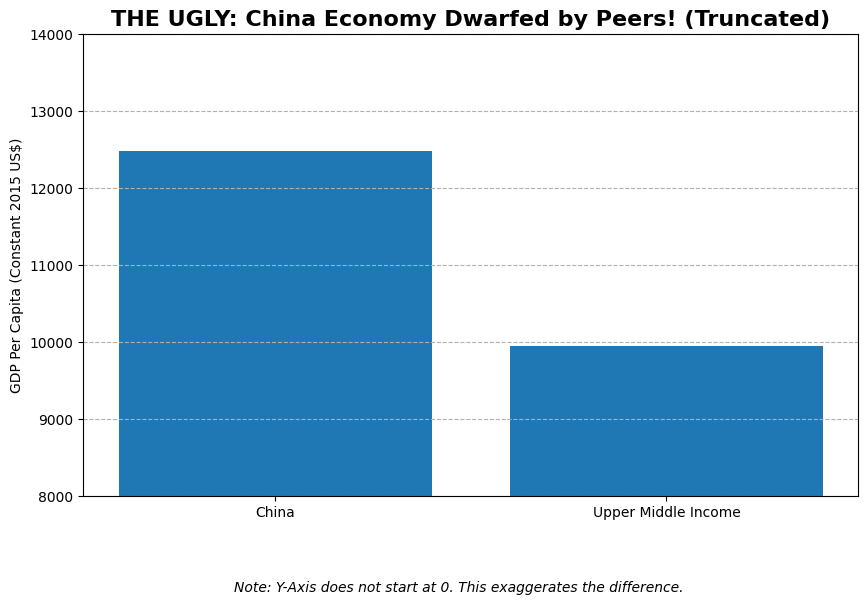

In [ ]:
# THE UGLY CHART (China vs Upper Middle Income)
snapshot_year = 2023

chn_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [chn_val, umc_val]
labels = ['China', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values)

# THE VIOLATION: Truncating the axis (exaggerates differences)
plt.ylim(8000, 14000)

plt.title('THE UGLY: China Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold')
plt.ylabel('GDP Per Capita (Constant 2015 US$)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05,
            "Note: Y-Axis does not start at 0. This exaggerates the difference.",
            ha="center", style='italic')
plt.show()


plt.show()

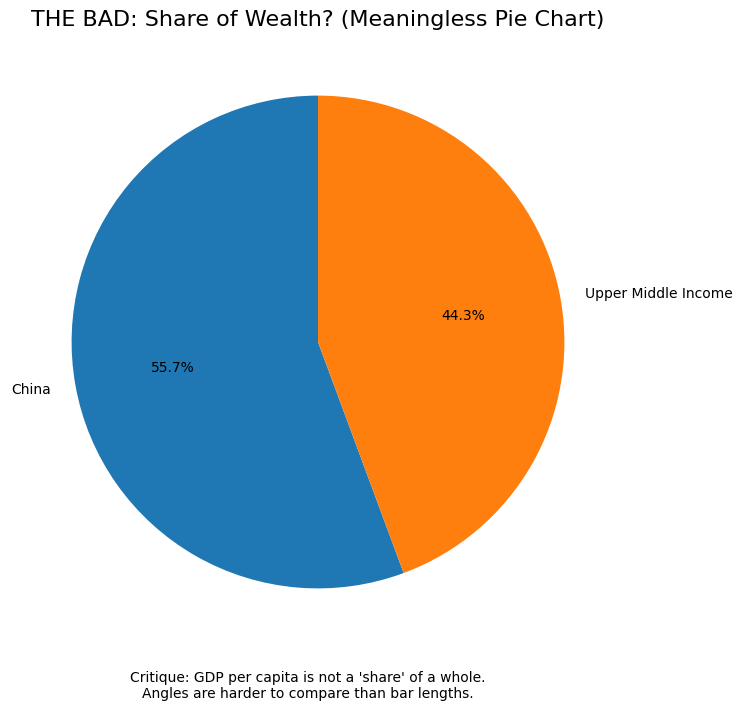

In [ ]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# BAD: Pie chart for non-summable data (GDP per capita)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(
    0.5, 0.05,
    "Critique: GDP per capita is not a 'share' of a whole.\n"
    "Angles are harder to compare than bar lengths.",
    ha="center"
)

plt.show()


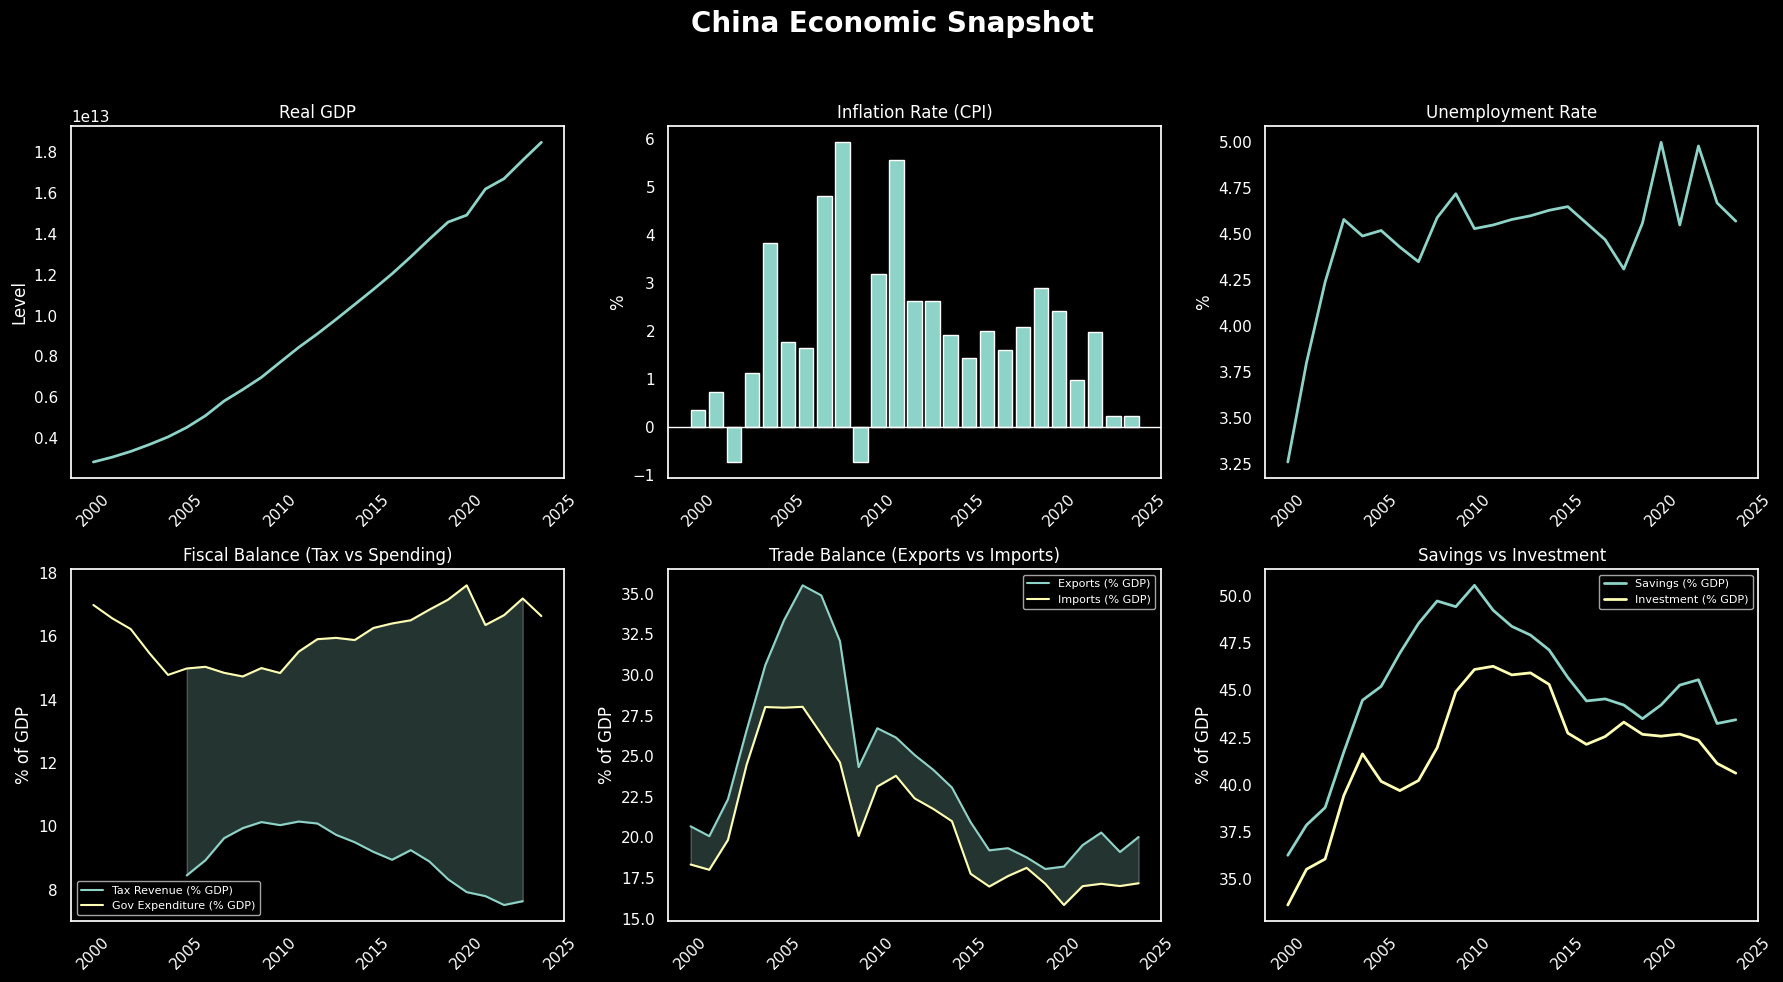

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

# 1) Extract China dataframe (same structure as df_gtm)
df_chn = df['CHN'].copy()
df_chn = df_chn.sort_index()

# 2) 2x3 Executive Dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('China Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# (1) Top Left: Real GDP (Line)
ax = axes[0, 0]
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', ax=ax, linewidth=2)
ax.set_title('Real GDP')
ax.set_xlabel('')
ax.set_ylabel('Level')

# (2) Top Middle: Inflation Rate (Bar) + 0 line
ax = axes[0, 1]
ax.bar(df_chn.index, df_chn['Inflation_CPI'])
ax.axhline(0, linewidth=1)
ax.set_title('Inflation Rate (CPI)')
ax.set_xlabel('')
ax.set_ylabel('%')

# (3) Top Right: Unemployment Rate (Line)
ax = axes[0, 2]
sns.lineplot(data=df_chn, x=df_chn.index, y='Unemployment_Rate', ax=ax, linewidth=2)
ax.set_title('Unemployment Rate')
ax.set_xlabel('')
ax.set_ylabel('%')

# (4) Bottom Left: Fiscal Balance (Fill between Tax Revenue and Gov Expenditure)
ax = axes[1, 0]
tax = df_chn['Tax_Rev_GDP']
gov = df_chn['Gov_Exp_GDP']
ax.plot(df_chn.index, tax, linewidth=1.5, label='Tax Revenue (% GDP)')
ax.plot(df_chn.index, gov, linewidth=1.5, label='Gov Expenditure (% GDP)')
ax.fill_between(df_chn.index, tax, gov, alpha=0.25)
ax.set_title('Fiscal Balance (Tax vs Spending)')
ax.set_xlabel('')
ax.set_ylabel('% of GDP')
ax.legend(fontsize=8, loc='best')

# (5) Bottom Middle: Trade Balance (Fill between Exports and Imports)
ax = axes[1, 1]
exp = df_chn['Exports_GDP']
imp = df_chn['Imports_GDP']
ax.plot(df_chn.index, exp, linewidth=1.5, label='Exports (% GDP)')
ax.plot(df_chn.index, imp, linewidth=1.5, label='Imports (% GDP)')
ax.fill_between(df_chn.index, exp, imp, alpha=0.25)
ax.set_title('Trade Balance (Exports vs Imports)')
ax.set_xlabel('')
ax.set_ylabel('% of GDP')
ax.legend(fontsize=8, loc='best')

# (6) Bottom Right: Savings vs Investment (Dual lines)
ax = axes[1, 2]
sns.lineplot(data=df_chn, x=df_chn.index, y='Gross_Dom_Savings', ax=ax, linewidth=2, label='Savings (% GDP)')
sns.lineplot(data=df_chn, x=df_chn.index, y='Gross_Cap_Formation', ax=ax, linewidth=2, label='Investment (% GDP)')
ax.set_title('Savings vs Investment')
ax.set_xlabel('')
ax.set_ylabel('% of GDP')
ax.legend(fontsize=8, loc='best')

# Rotate x labels for readability
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
